### Packages & Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import read_data

In [ ]:
filepath_path = "data/vihallu-warmup.csv"
data = read_data(filepath_path)
data.head()

,id,context,prompt,response,label
0,c480e0d2-72e5-47d6-baca-a884db935c8c,"Theo pháp lệnh Vincennes năm 1374, vương quốc ...",Quyền phản đối được khôi phục bởi Orléans đã g...,Quyền phản đối còn cho phép Nghị viện được bổ ...,extrinsic
1,8e225849-4ed1-4397-8519-2b4cfee0c7c6,Hệ thống đường biển xuất phát từ các cảng biển...,Những sông lớn nào là các tuyến đường thủy nội...,Các tuyến đường thủy nội địa huyết mạch chạy t...,intrinsic
2,c5a2aef8-4c3f-4bac-9fc3-814094578fc0,"Năm 1928, Bộ Giao thông khởi thảo kế hoạch côn...",Độ dài công lộ Hán Trung-Thất Bàn Quan là bao ...,Công lộ Hán Trung-Thất Bàn Quan dài hơn 150 km...,extrinsic
3,0bae8fee-cd84-4ec1-a324-0777f6fa7a32,Sự tiến hóa của giới thực vật đã theo xu hướng...,Vì thực vật hạt trần chiếm ưu thế trong việc t...,Thực vật hạt trần kém đa dạng hơn và hiếm gặp ...,no
4,a8dcd1ed-c9a1-4786-b97b-27244896ff95,"Kể từ những năm 1970, chính phủ cũng thực hiện...",Cacs loaji dược pham muôn vào thi trường My ph...,Các loại dược phẩm muốn vào thị trường Mỹ phải...,no


#### Problem Details
- Input: context, prompt, & response

- Output: label (no|extrinsic|intrinsic)
    - no: 
        - It is completely consistent and truthful with the information provided in the context.
        - It does not contain any false information or information that cannot be directly inferred from the context.
        - It answers correctly based on the context.
    - extrinsic:
        - It directly contradicts or distorts information clearly provided in the context.
        - The content of the illusion is still based on entities or concepts present in the context, but the information about them is altered or distorted.
        - The LLM produces a misleading answer that sounds quite plausible in that context.
    - intrinsic
        - It supplements information NOT PRESENT in the context.
        - The additional information cannot be inferred from the context.
        - The additional information might be true in the real world, but it is not provided in the context.
        - The response still tries to answer the prompt but adds details not originating from the context.

### Data Analysis

In [22]:
print("Distribution of label:\n", data['label'].value_counts().reset_index())

Distribution of label:
        label  count
0  extrinsic     66
1  intrinsic     66
2         no     66


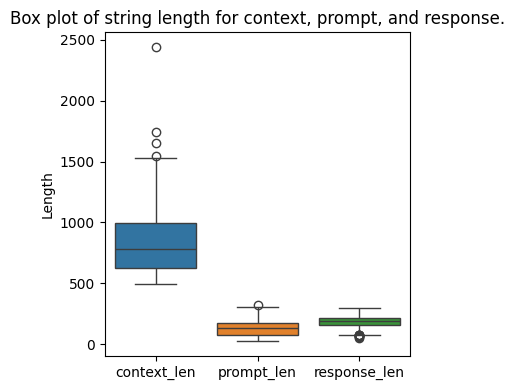

In [17]:
data['context_len'] = data['context'].astype(str).apply(len)
data['prompt_len'] = data['prompt'].astype(str).apply(len)
data['response_len'] = data['response'].astype(str).apply(len)

plt.figure(figsize=(4, 4))
sns.boxplot(data=data[['context_len', 'prompt_len', 'response_len']])
plt.title('Box plot of string length for context, prompt, and response.')
plt.ylabel('Length')
plt.tight_layout()
plt.show()

In [21]:
print("Mean lengths of input by label:\n", data.groupby('label')[['context_len', 'prompt_len', 'response_len']].mean().reset_index())

Mean lengths of input by label:
        label  context_len  prompt_len  response_len
0  extrinsic   858.575758  128.803030    218.787879
1  intrinsic   844.090909  136.515152    178.757576
2         no   832.560606  129.818182    153.121212
